In [1]:
#Importing  required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
#Importing Data
df = pd.read_excel('Data_Train.xlsx')
pd.set_option('display.max_columns',None)
#Getting some information of data set
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
#checking for Null values
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [3]:
#As there is only one nulll value for route and total stops,dropping it would be the best option

df.dropna(inplace=True)

# Exploratory Data Analysis

In [4]:
#Breaking  date to day, months -'Date_of_Journey'
df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df.drop(['Date_of_Journey'],axis=1,inplace=True)

#Breaking date to hour,minutes-'Dep_Time'
df['Dep_Time_hour']=pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_Time_minute']=pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)
#'Duration' column
df['Duration'].replace(to_replace=r'h', value=':', regex=True,inplace=True)
df['Duration'].replace(to_replace=r'm', value='', regex=True,inplace=True)
df['Duration'].replace(to_replace=r' ', value='', regex=True,inplace=True)
df['Duration'].replace(to_replace=r':$', value=':0', regex=True,inplace=True)
df[['Duration_hour','Duration_minutes']] = df.Duration.str.split(":",expand=True)

In [5]:
df.isna().any()

Airline             False
Source              False
Destination         False
Route               False
Arrival_Time        False
Duration            False
Total_Stops         False
Additional_Info     False
Price               False
Day_of_Journey      False
Month_of_Journey    False
Dep_Time_hour       False
Dep_Time_minute     False
Duration_hour       False
Duration_minutes     True
dtype: bool

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(['Duration'],axis=1,inplace=True)
df['Duration_minutes']=df['Duration_minutes'].astype(int)
df['Duration_hour']=df['Duration_hour'].astype(int)

In [8]:
#Let's break date to hour,minutes-''Arrival_Time''
df['Arrival_Time'].replace(to_replace=r' .*', value='', regex=True,inplace=True)
df['Arrival_Time_hour']=pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.hour
df['Arrival_Time_minute']=pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.minute

df.drop(['Arrival_Time'],axis=1,inplace=True)



In [9]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,4,45,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,2,30,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,2,35,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,3,0,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,2,40,14,10


# Handling Categorical Data

In [10]:
*'Ailine',

('A', 'i', 'l', 'i', 'n', 'e')

In [11]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

Airline vs Price

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

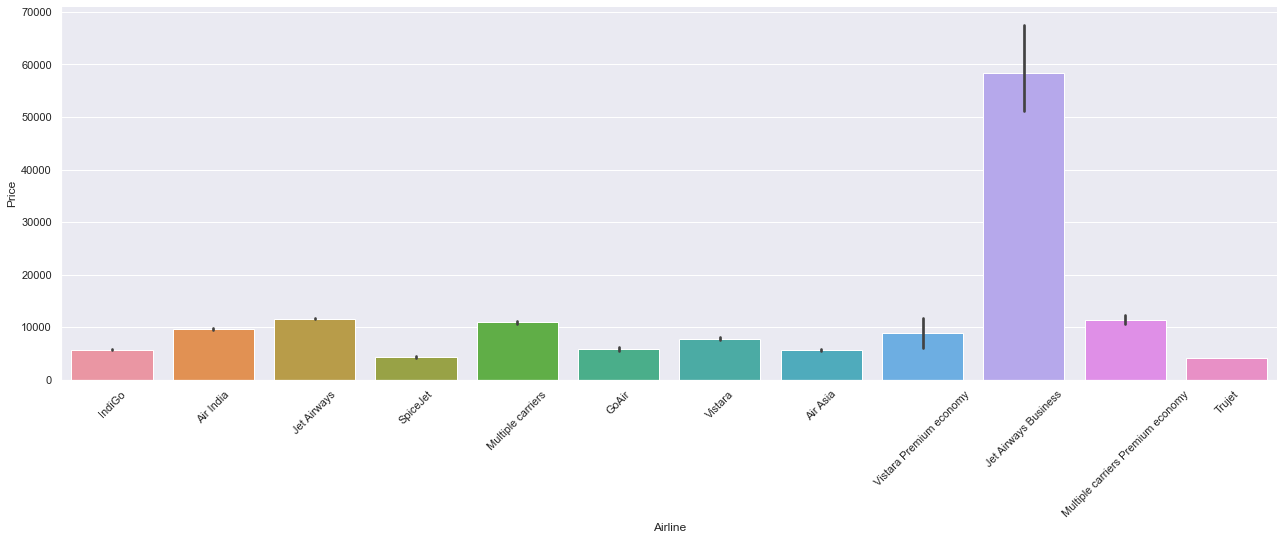

In [12]:
sns.catplot(y = 'Price', x = 'Airline', data = df, kind="bar", height =6, aspect =3)
plt.xticks(rotation=45)

In [13]:
df_Airline=pd.get_dummies(df['Airline'], drop_first= True)

In [14]:
df_Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [15]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

Source vs Price

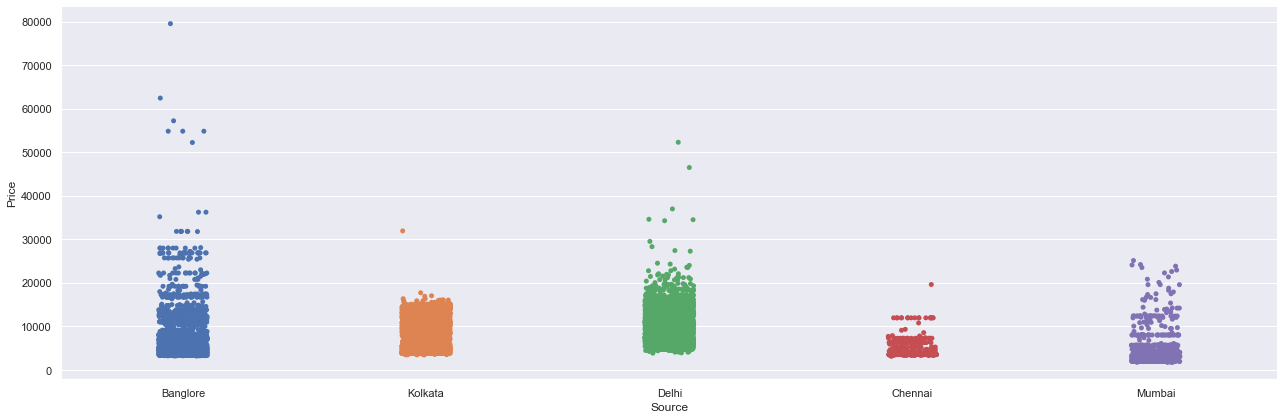

In [16]:
sns.catplot(y = 'Price', x = 'Source', data = df,  height = 6, aspect = 3)
plt.show()

In [17]:
df_Source=pd.get_dummies(df['Source'], prefix='Source', drop_first= True)



In [18]:
df_Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [19]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Destination vs Price

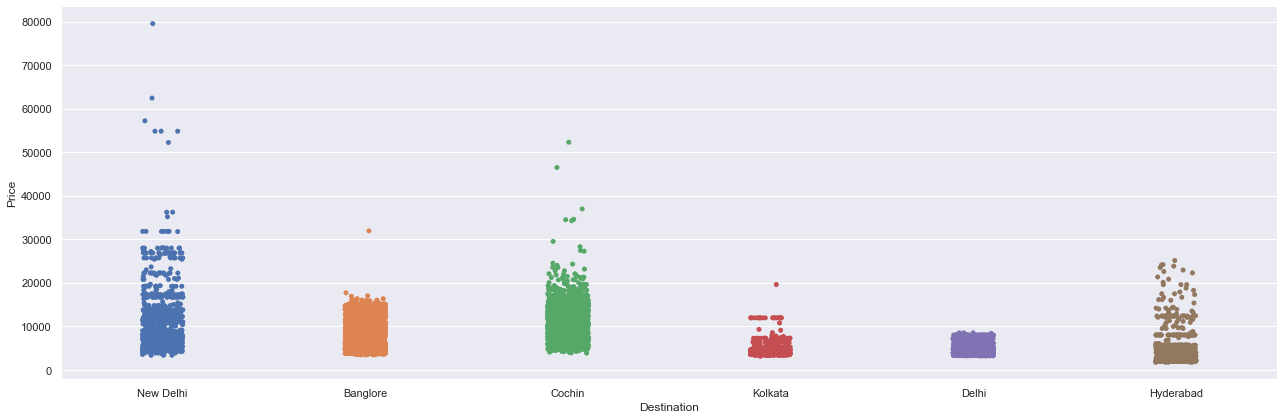

In [20]:
sns.catplot(y = 'Price', x = 'Destination', data = df, height = 6, aspect = 3)
plt.show()

In [21]:


df_Destination=pd.get_dummies(df['Destination'], prefix='Destination',drop_first= True)

In [22]:
df_Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [23]:
df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [24]:
df.drop(['Airline','Source','Destination','Additional_Info','Route'],axis=1,inplace=True)

In [25]:
df

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes,Arrival_Time_hour,Arrival_Time_minute
0,non-stop,3897,24,3,22,20,2,50,1,10
1,2 stops,7662,1,5,5,50,7,25,13,15
2,2 stops,13882,9,6,9,25,19,0,4,25
3,1 stop,6218,12,5,18,5,5,25,23,30
4,1 stop,13302,1,3,16,50,4,45,21,35
...,...,...,...,...,...,...,...,...,...,...
10678,non-stop,4107,9,4,19,55,2,30,22,25
10679,non-stop,4145,27,4,20,45,2,35,23,20
10680,non-stop,7229,27,4,8,20,3,0,11,20
10681,non-stop,12648,1,3,11,30,2,40,14,10


In [26]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [27]:
train_data=pd.concat([df,df_Airline,df_Source,df_Destination],axis=1)

In [28]:
train_data.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes,Arrival_Time_hour,Arrival_Time_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
train_data.shape

(10681, 30)

In [30]:
df1=pd.read_excel('Test_set.xlsx')
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [31]:
df1.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
dtype: bool

In [32]:
df1['Day_of_Journey']=pd.to_datetime(df1['Date_of_Journey'], format='%d/%m/%Y').dt.day
df1['Month_of_Journey']=pd.to_datetime(df1['Date_of_Journey'], format='%d/%m/%Y').dt.month
df1.drop(['Date_of_Journey'],axis=1,inplace=True)

In [33]:
df1['Dep_Time_hour']=pd.to_datetime(df1['Dep_Time'], format='%H:%M').dt.hour
df1['Dep_Time_minute']=pd.to_datetime(df1['Dep_Time'], format='%H:%M').dt.minute
df1.drop(['Dep_Time'],axis=1,inplace=True)

In [34]:
df1['Duration'].replace(to_replace=r'h', value=':', regex=True,inplace=True)
df1['Duration'].replace(to_replace=r'm', value='', regex=True,inplace=True)
df1['Duration'].replace(to_replace=r' ', value='', regex=True,inplace=True)
df1['Duration'].replace(to_replace=r':$', value=':0', regex=True,inplace=True)
df1[['Duration_hour','Duration_minutes']] = df1.Duration.str.split(":",expand=True)

In [35]:
df1.isna().any()

Airline             False
Source              False
Destination         False
Route               False
Arrival_Time        False
Duration            False
Total_Stops         False
Additional_Info     False
Day_of_Journey      False
Month_of_Journey    False
Dep_Time_hour       False
Dep_Time_minute     False
Duration_hour       False
Duration_minutes     True
dtype: bool

In [36]:
df1.dropna(inplace=True)

In [37]:
df1

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10:55,1 stop,No info,6,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4:0,1 stop,No info,12,5,6,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23:45,1 stop,In-flight meal not included,21,5,19,15,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13:0,1 stop,No info,21,5,8,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2:50,non-stop,No info,24,6,23,55,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23:55,1 stop,No info,6,6,20,30,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2:35,non-stop,No info,27,3,14,20,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6:35,1 stop,No info,6,3,21,50,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15:15,1 stop,No info,6,3,4,0,15,15


In [38]:
df1.drop(['Duration'],axis=1,inplace=True)
df1['Duration_minutes']=df1['Duration_minutes'].astype(int)
df1['Duration_hour']=df1['Duration_hour'].astype(int)



df1['Arrival_Time'].replace(to_replace=r' .*', value='', regex=True,inplace=True)
df1['Arrival_Time_hour']=pd.to_datetime(df1['Arrival_Time'], format='%H:%M').dt.hour
df1['Arrival_Time_minute']=pd.to_datetime(df1['Arrival_Time'], format='%H:%M').dt.minute

df1.drop(['Arrival_Time'],axis=1,inplace=True)

df1_Airline=pd.get_dummies(df1['Airline'], drop_first= True)

df1_Source=pd.get_dummies(df1['Source'], prefix='Source', drop_first= True)

df1_Destination=pd.get_dummies(df1['Destination'], prefix='Destination',drop_first= True)

df1.drop(['Airline','Source','Destination','Additional_Info','Route'],axis=1,inplace=True)

df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

test_data=pd.concat([df1,df1_Airline,df1_Source,df1_Destination],axis=1)


In [39]:
test_data

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_minutes,Arrival_Time_hour,Arrival_Time_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,10,55,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,4,0,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,23,45,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,13,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,50,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,23,55,20,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,2,35,16,55,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,6,35,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,15,15,19,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [40]:
test_data.shape

(2670, 28)

# Finding relation between features

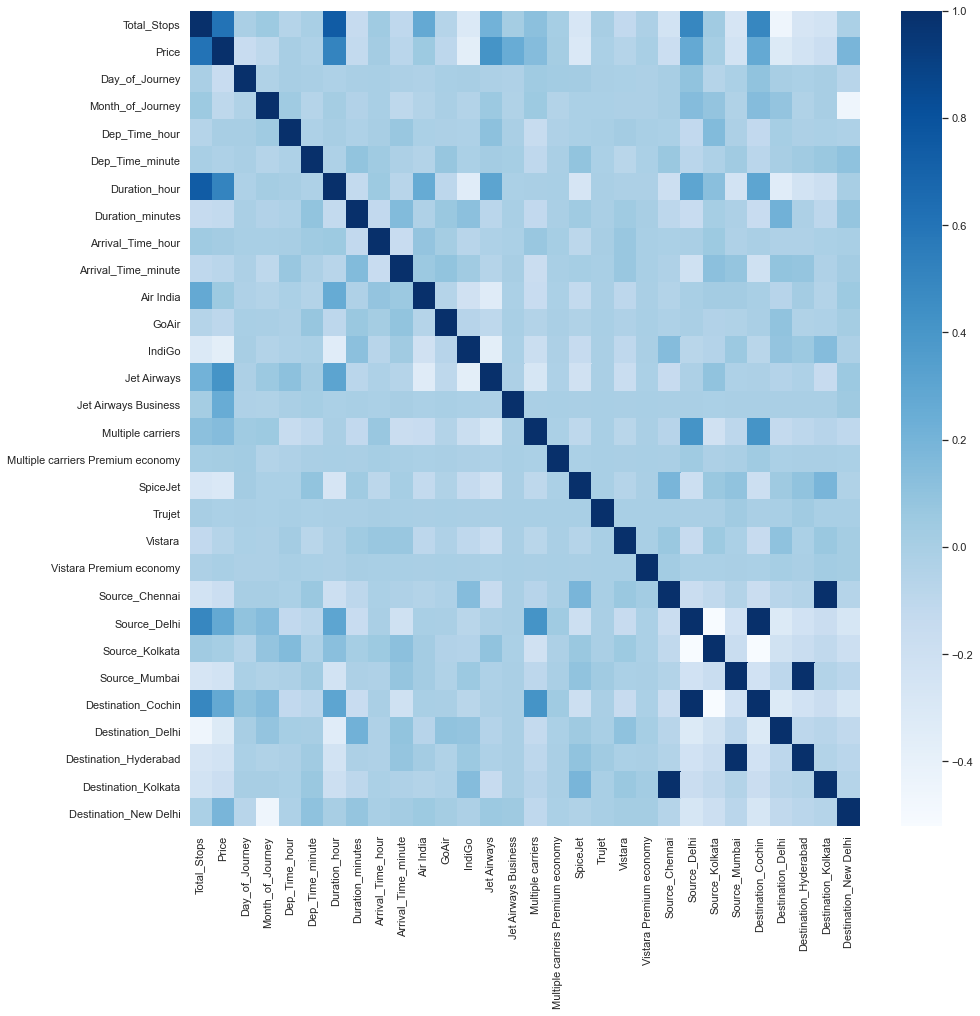

In [41]:
plt.figure(figsize = (15,15))
sns.heatmap(train_data.corr(),cmap="Blues")

plt.show()

In [42]:
X=train_data.drop(['Price'],axis=1)
y=train_data['Price']

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [44]:
selection.feature_importances_

array([2.15607320e-01, 1.43795548e-01, 5.34114155e-02, 2.47699607e-02,
       2.16222431e-02, 1.25848080e-01, 1.70773142e-02, 2.78125404e-02,
       1.98154956e-02, 9.40924974e-03, 1.83361608e-03, 1.87206944e-02,
       1.41246099e-01, 6.77371528e-02, 1.85623728e-02, 8.63658423e-04,
       3.33936201e-03, 1.06950109e-04, 5.00816053e-03, 8.69357652e-05,
       5.23297874e-04, 1.03410958e-02, 3.29835684e-03, 8.38925116e-03,
       1.03269397e-02, 1.83756244e-02, 6.53666342e-03, 5.86353634e-04,
       2.49482468e-02])

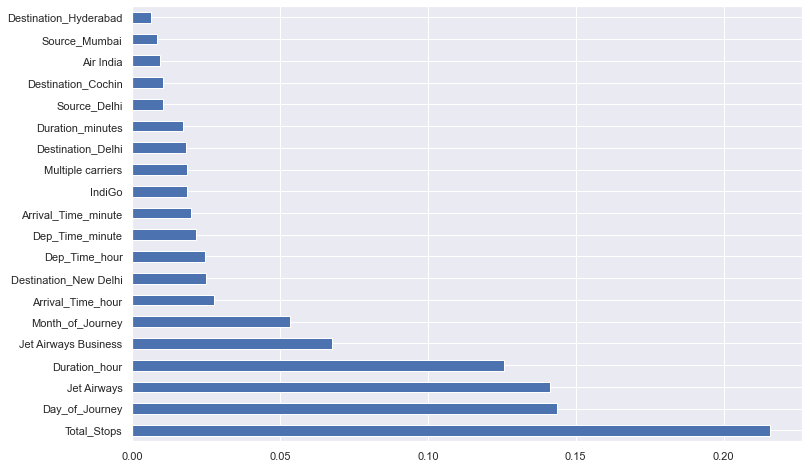

In [45]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
import xgboost as xg
xg_br=xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

xg_br.fit(X_train, y_train)
  

pred = xg_br.predict(X_test)
  
  

In [48]:
pred

array([ 5377.7954,  8482.287 ,  9438.843 , ...,  7724.8438, 11932.248 ,
       14060.526 ], dtype=float32)

In [49]:
xg_br.score(X_train, y_train)

0.8226786232235456

In [50]:
xg_br.score(X_test, y_test)

0.8150822758167362

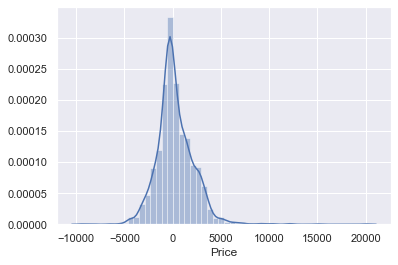

In [51]:
sns.distplot(y_test-pred)

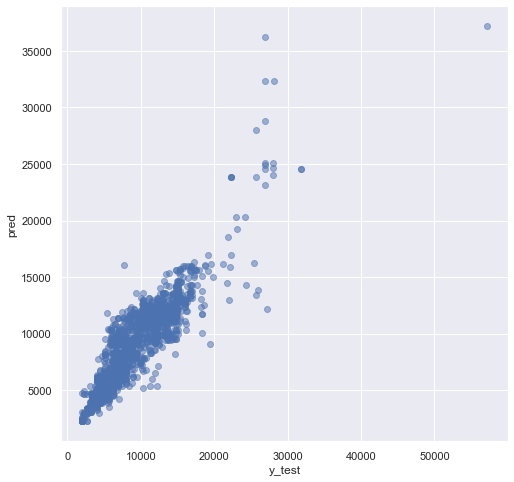

In [52]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("pred")
plt.show()

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1394.4864232907187
MSE: 3903938.795847071
RMSE: 1975.8387575526174


In [54]:
from sklearn.model_selection import RandomizedSearchCV

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [55]:
random_search=RandomizedSearchCV(xg.XGBRegressor(),param_distributions=params,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, score=0.836, total=   0.7s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, score=0.839, total=   0.7s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, score=0.801, total=   0.7s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, score=0.749, total=   0.7s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.3, gamma=0.3, colsample_bytree=0.7, score=0.795, total=   0.7s
[CV] min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, score=0.824, total=   0.3s
[CV] min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=4, learning_rate=0.1, gamma=0.4, colsample_bytree=0.7, score=0.815, total=   0.3s
[CV] min_child_weight=3, max_depth=4, learning_rat

[CV]  min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4, score=0.803, total=   0.3s
[CV] min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4, score=0.763, total=   0.3s
[CV] min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.4, colsample_bytree=0.4, score=0.805, total=   0.3s
[CV] min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.2, colsample_bytree=0.4, score=0.828, total=   0.3s
[CV] min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.2, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=4, learning_rate=0.15, gamma=0.2, colsample_bytree=0.4, score=0.822, total=   0.3s
[CV] min_child_weight=3, max_depth=4, learning

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.8s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [56]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [57]:
prediction = random_search.predict(X_test)

In [58]:
random_search.score(X_test, y_test)

0.8561754428172549

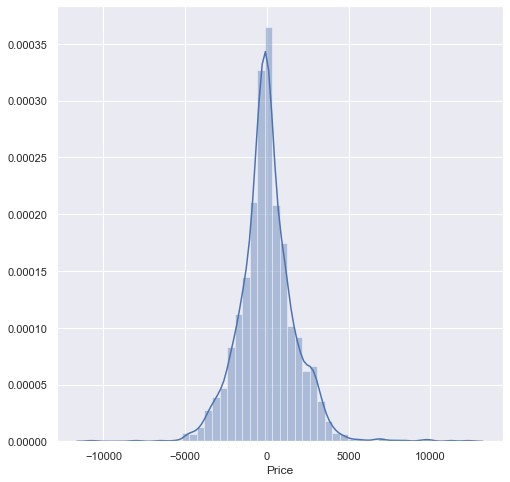

In [59]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [60]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df_compare


,Actual,Predicted
4830,7476,6705.953125
3771,7927,8621.545898
1523,5963,9385.862305
3393,16289,13909.114258
4169,8016,6843.325684
...,...,...
9871,4622,5786.225586
10063,7452,6540.995117
6912,7480,6983.006348
8617,14151,12738.390625


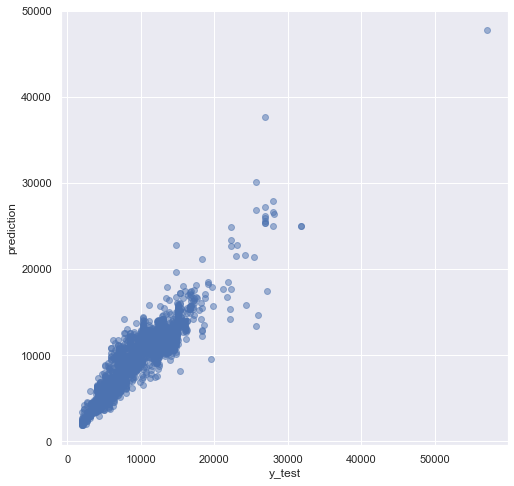

In [61]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1236.8892827977852
MSE: 3036389.6757932394
RMSE: 1742.5239383702135


In [68]:
import pickle
with open('flight_fare.pkl','wb') as file:
    pickle.dump(random_search,file)
    
with open('flight_fare.pkl','rb') as model:
    prediction=pickle.load(model)
    
y_predict=prediction.predict(X_test)
metrics.r2_score(y_test,y_predict)


0.8561754428172549